# PIB DE CHINA

En este proyecto, Principalmente analiza el PIB anuales de las  provincias de  China desde 1992 hasta 2020. mediante la visualización de datos, descubriré información sobre el propio conjunto de datos, como las distribuciones y los combios del PIB. A continuacion,Se utilizaron dos conjuntos de variables, la tasa de pobreza y el pib total anual en China, para analizar si existía una correlación.

Los datos proceden de Kaggle y del Banco Mundial. Tenga en cuenta que los datos no incluyen  Hong Kong ni  Macao ni Taiwan.


## Import packages and dataset

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import json

## Carga, inspección y limpieza

In [57]:
df_1 = pd.read_csv("China's GDP in Province En.csv")

In [58]:
df_1.rename({'Unnamed: 0':'años','Guangxi,':'Guangxi'}, axis=1, inplace=True)
df_1.head()

,años,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,...,25002.8,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6
1,2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,...,23605.8,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1
2,2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,...,21588.8,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4
3,2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,...,20066.3,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9
4,2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,...,18023.0,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8


In [59]:
df_1['PIB total']=df_1.loc[:,"Beijing":"Xinjiang"].sum(axis=1)
df_1.head()

,años,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,PIB total
0,2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,...,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6,1012415.2
1,2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,...,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1,982320.5
2,2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,...,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4,914117.5
3,2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,...,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9,832096.4
4,2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,...,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8,750948.6


In [60]:
df_1_1=df_1.sort_values(by="años" , ascending=True).reset_index(drop=True)
df_1_1.head()

,años,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,PIB total
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3,25956.0
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3,34123.5
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3,45260.6
3,1995,1516.2,932.0,2701.2,1076.0,857.1,2793.4,1137.2,1790.2,2518.1,...,2443.2,636.2,1222.2,56.1,1036.9,557.8,167.8,175.2,814.9,57421.8
4,1996,1819.4,1121.9,3198.0,1292.1,1023.1,3157.7,1346.8,2137.6,2980.8,...,2871.7,723.2,1517.7,65.0,1215.8,722.5,184.2,202.9,900.9,67595.6


In [61]:
df_2=pd.read_csv("tasa_de_pobreza.csv")

In [62]:
china_pobreza=df_2[df_2["Country Code"]=="CHN"].loc[:,"1992":"2020"].T.reset_index(drop=False)

In [63]:
china_pobreza.rename(columns={"index":"años",40:"tasa de pobreza"},inplace=True)

In [64]:
china_pobreza["tasa de pobreza"].fillna(method='bfill',inplace=True)

In [65]:
china_pobreza["años"]=china_pobreza["años"].astype(int)
china_pobreza.head()

,años,tasa de pobreza
0,1992,56.7
1,1993,56.7
2,1994,41.7
3,1995,41.7
4,1996,41.7


In [66]:
display(china_pobreza,df_1_1)

,años,tasa de pobreza
0,1992,56.7
1,1993,56.7
2,1994,41.7
3,1995,41.7
4,1996,41.7
5,1997,40.3
6,1998,40.3
7,1999,40.3
8,2000,31.7
9,2001,31.7


,años,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,PIB total
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3,25956.0
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3,34123.5
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3,45260.6
3,1995,1516.2,932.0,2701.2,1076.0,857.1,2793.4,1137.2,1790.2,2518.1,...,2443.2,636.2,1222.2,56.1,1036.9,557.8,167.8,175.2,814.9,57421.8
4,1996,1819.4,1121.9,3198.0,1292.1,1023.1,3157.7,1346.8,2137.6,2980.8,...,2871.7,723.2,1517.7,65.0,1215.8,722.5,184.2,202.9,900.9,67595.6
5,1997,2118.1,1264.6,3652.1,1476.0,1153.5,3582.5,1464.3,2397.6,3465.3,...,3241.5,805.8,1676.2,77.2,1363.6,793.6,202.8,224.6,1039.8,76168.2
6,1998,2439.1,1344.7,3924.5,1611.1,1262.5,3881.7,1577.1,2470.2,3831.0,...,3474.1,858.4,1831.3,91.5,1458.4,887.7,220.9,245.5,1107.0,82373.9
7,1999,2759.8,1435.6,4158.9,1667.1,1379.3,4171.7,1673.0,2536.9,4222.3,...,3649.1,937.5,1899.8,106.0,1592.6,956.3,239.4,264.6,1163.2,88028.9
8,2000,3277.8,1591.7,4628.2,1845.7,1539.1,4669.1,1751.4,2855.5,4812.2,...,3928.2,1029.9,2030.1,117.8,1804.0,1052.9,263.7,295.0,1363.6,98134.4
9,2001,3861.5,1756.9,5062.9,2029.5,1713.8,5033.1,1900.9,3043.4,5257.7,...,4293.5,1133.3,2159.0,139.2,2010.6,1125.4,300.1,337.4,1491.6,108107.0


In [67]:
china_pobreza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   años             29 non-null     int64  
 1   tasa de pobreza  28 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [68]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   años            29 non-null     int64  
 1   Beijing         29 non-null     float64
 2   Tianjin         29 non-null     float64
 3   Hebei           29 non-null     float64
 4   Shanxi          29 non-null     float64
 5   Inner Mongolia  29 non-null     float64
 6   Liaoning        29 non-null     float64
 7   Jilin           29 non-null     float64
 8   Heilongjiang    29 non-null     float64
 9   Shanghai        29 non-null     float64
 10  Jiangsu         29 non-null     float64
 11  Zhejiang        29 non-null     float64
 12  Anhui           29 non-null     float64
 13  Fujian          29 non-null     float64
 14  Jiangxi         29 non-null     float64
 15  Shandong        29 non-null     float64
 16  Henan           29 non-null     float64
 17  Hubei           29 non-null     float

## Fusiona los dotos (merge)

In [69]:
china_data=china_pobreza.merge(df_1_1,on="años")
china_data.head()

,años,tasa de pobreza,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,PIB total
0,1992,56.7,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,...,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3,25956.0
1,1993,56.7,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,...,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3,34123.5
2,1994,41.7,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,...,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3,45260.6
3,1995,41.7,1516.2,932.0,2701.2,1076.0,857.1,2793.4,1137.2,1790.2,...,2443.2,636.2,1222.2,56.1,1036.9,557.8,167.8,175.2,814.9,57421.8
4,1996,41.7,1819.4,1121.9,3198.0,1292.1,1023.1,3157.7,1346.8,2137.6,...,2871.7,723.2,1517.7,65.0,1215.8,722.5,184.2,202.9,900.9,67595.6


## Análisis

### Estructura de la tabla

In [70]:
# drop los columas que no es necesario
chinapib_provincia=china_data.drop(["tasa de pobreza","PIB total"],axis=1)
chinapib_provincia.head()

,años,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,1992,710.2,411.0,1278.5,551.1,421.7,1473.0,558.1,857.4,1114.3,...,462.5,1177.3,339.9,618.7,33.3,531.6,317.8,87.5,83.1,402.3
1,1993,888.9,538.9,1620.8,680.4,537.8,2010.8,718.6,1075.3,1519.2,...,611.1,1486.1,417.7,783.3,37.4,678.2,372.2,109.7,104.5,495.3
2,1994,1149.8,732.9,2114.5,826.7,695.1,2461.8,937.7,1448.1,1990.9,...,838.1,2001.4,524.5,983.8,46.0,839.0,453.6,138.4,136.3,662.3
3,1995,1516.2,932.0,2701.2,1076.0,857.1,2793.4,1137.2,1790.2,2518.1,...,1130.6,2443.2,636.2,1222.2,56.1,1036.9,557.8,167.8,175.2,814.9
4,1996,1819.4,1121.9,3198.0,1292.1,1023.1,3157.7,1346.8,2137.6,2980.8,...,1326.4,2871.7,723.2,1517.7,65.0,1215.8,722.5,184.2,202.9,900.9


In [71]:
# melt table
chinapib=chinapib_provincia.melt(id_vars=['años'],var_name=['provincia'], value_name='PIB')
chinapib

,años,provincia,PIB
0,1992,Beijing,710.2
1,1993,Beijing,888.9
2,1994,Beijing,1149.8
3,1995,Beijing,1516.2
4,1996,Beijing,1819.4
...,...,...,...
894,2016,Xinjiang,9630.8
895,2017,Xinjiang,11159.9
896,2018,Xinjiang,12809.4
897,2019,Xinjiang,13597.1


### Distribución
Utilizando boxplots, trazar la distribución del PIB  por provincia a lo largo de 1992-2020.

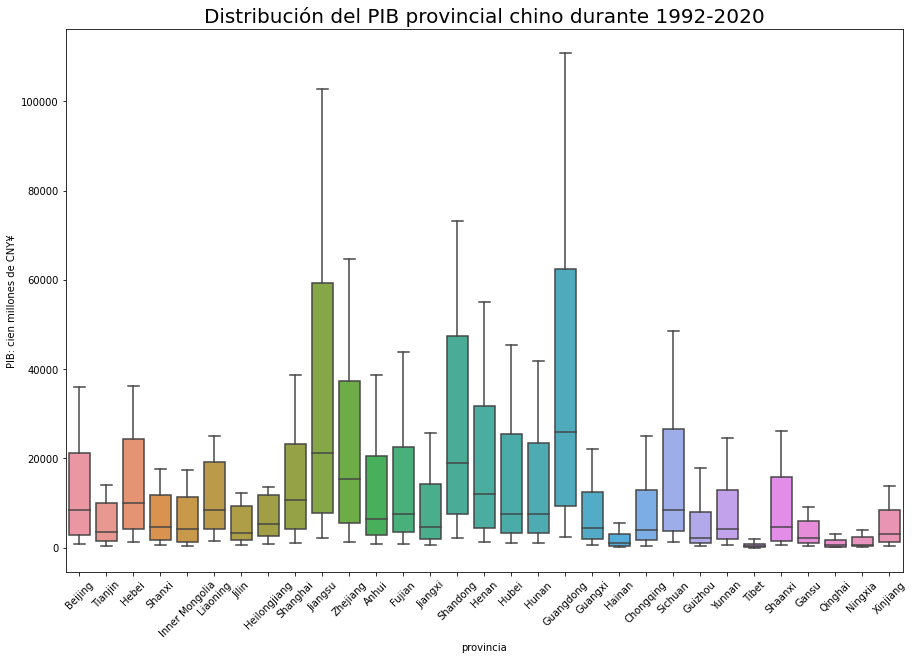

In [72]:
plt.figure(figsize=(15,10))
sns.boxplot(x="provincia",y="PIB",data=chinapib)
plt.xticks(rotation=45);
plt.ylabel("PIB: cien millones de CNY¥")
plt.title("Distribución del PIB provincial chino durante 1992-2020" ,fontsize=20);

### El PIB anual a lo largo del tiempo
Visualización del PIB anual, en todas las provincias, como serie temporal a lo largo de 1992-2020 inclusive.

<Figure size 1080x720 with 0 Axes>

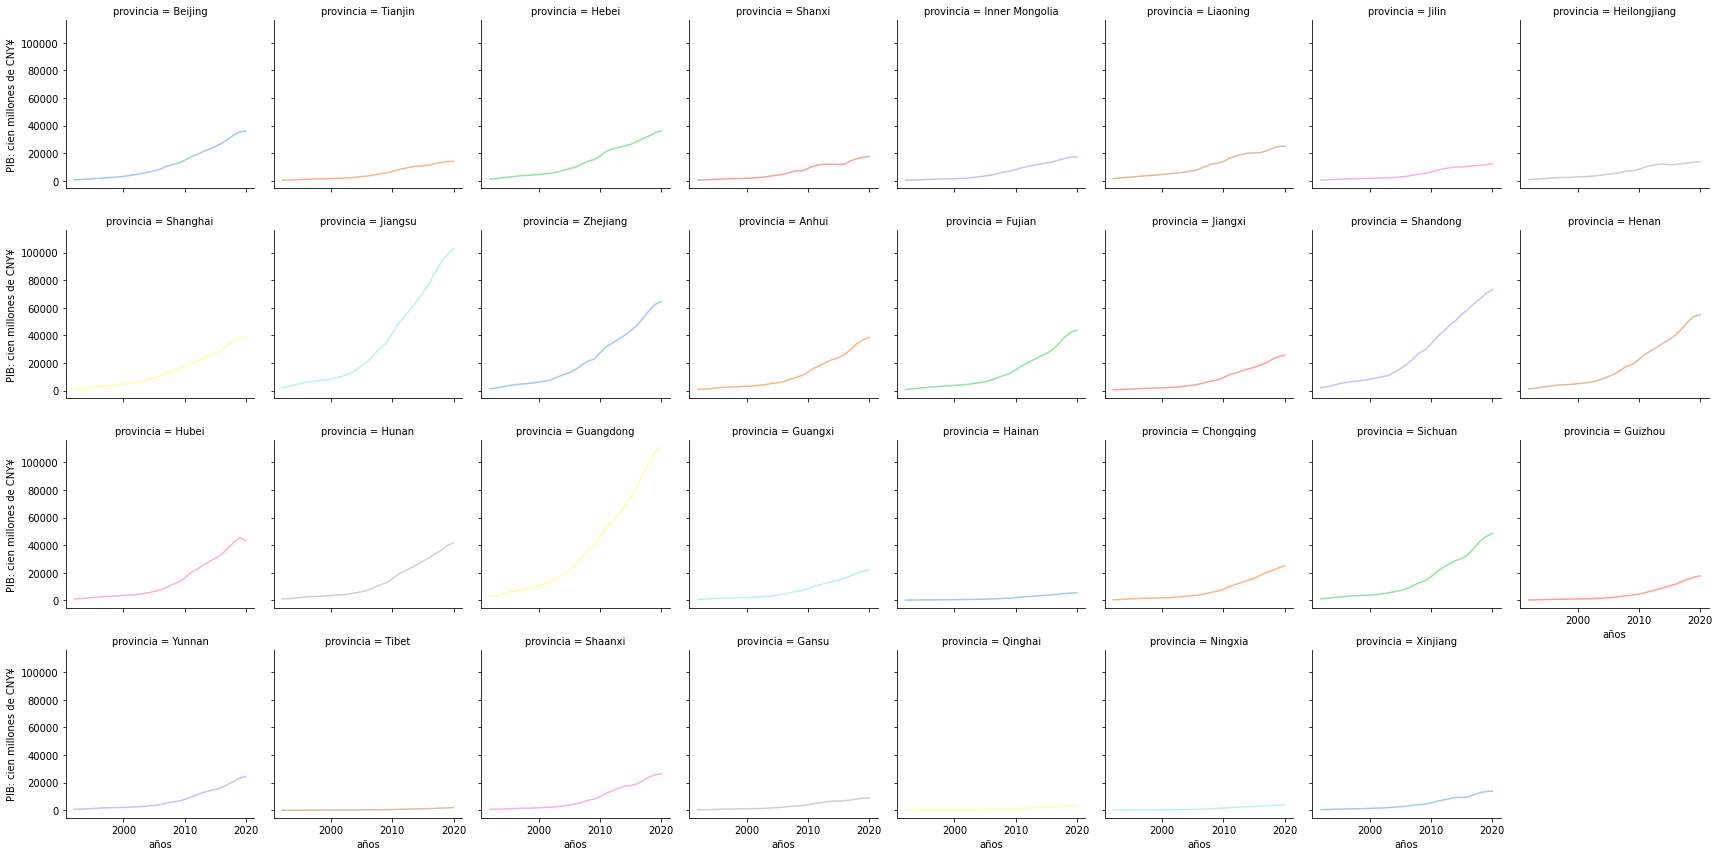

In [84]:
plt.figure(figsize=(15,10))
grid=sns.FacetGrid(data=chinapib,col='provincia',col_wrap=8,hue="provincia",palette="pastel")
grid.map(plt.plot,"años","PIB")
grid.set_ylabels("PIB: cien millones de CNY¥")
plt.show();

### Geográfico
Examinar el PIB en el contexto de los factores geográficos.

In [74]:
with open('china_geojson.json') as file:
    china_geojson = json.load(file)

In [75]:
def china_map(años):
   
    df_filtered = chinapib[chinapib.años==años]
    
   
    fig = go.Figure(go.Choroplethmapbox(geojson=china_geojson,
                                        locations=df_filtered.provincia, 
                                        z=df_filtered.PIB,
                                        colorscale='YlGn', 
                                        colorbar_ticksuffix = ' cien millones de CNY¥',
                                        colorbar_title = 'Valor del PIB provincial chino',
                                        marker_opacity=0.5, 
                                        marker_line_width=1))
    fig.update_layout(title_text=f'Annual PIB en {años}',
                      mapbox_style='white-bg',
                      mapbox_zoom=3, mapbox_center = {'lat': 37, 'lon': 110})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    plt.figure(figsize=(8,10))

    fig.show()

In [87]:
china_map(1992)

<Figure size 576x720 with 0 Axes>

In [86]:
china_map(2020) 

<Figure size 576x720 with 0 Axes>

## Corrección
Analizar si existía una correlación entre la tasa de pobreza y el pib total anual en China

In [78]:
china_corr=china_data[["años","tasa de pobreza","PIB total"]]
china_corr

,años,tasa de pobreza,PIB total
0,1992,56.7,25956.0
1,1993,56.7,34123.5
2,1994,41.7,45260.6
3,1995,41.7,57421.8
4,1996,41.7,67595.6
5,1997,40.3,76168.2
6,1998,40.3,82373.9
7,1999,40.3,88028.9
8,2000,31.7,98134.4
9,2001,31.7,108107.0


In [79]:
china_corr.corr()

,años,tasa de pobreza,PIB total
años,1.000000,-0.972788,0.949481
tasa de pobreza,-0.972788,1.000000,-0.868895
PIB total,0.949481,-0.868895,1.000000


Utilizando heatmap para representar una matriz de correlación

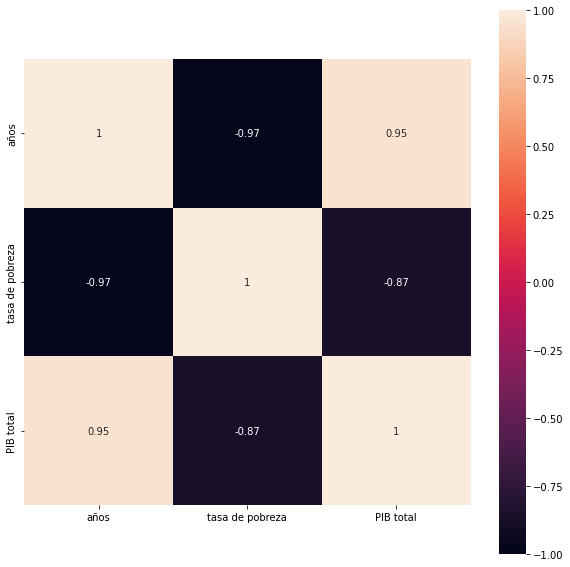

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(china_corr.corr(),
            vmin=-1,
            vmax=1,         
            square=True,
            annot=True);

Utilizando subplots , Comprobar la tendencia de dos variables.

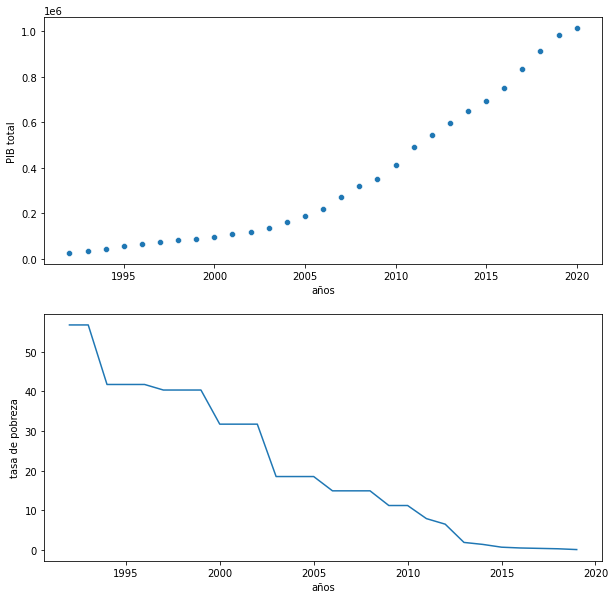

In [81]:
f,(axi1,axi2)=plt.subplots(2,1 ,figsize=(10,10))
sns.scatterplot(x="años",y="PIB total",data=china_corr,ax=axi1)
sns.lineplot(x="años",y="tasa de pobreza",data=china_corr,ax=axi2);